In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## 1) Problem Statement

- customer churn prediction

## 2) Data Gathering

In [2]:
df = pd.read_csv("randomdata.csv")
df.head()

,Unnamed: 0,Customer Name,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,Claim Request output,BMI,Churn
0,0,Christine Payne,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...","Williams, Henderson and Perez",Travel,Low,377,4794,0.078640,No,21,Yes
1,1,Tony Fernandez,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",Moore-Goodwin,Medical,High,1440,14390,0.100069,No,24,Yes
2,2,Christopher Kim,"8693 Walters Mountains,South Tony, TX 88407",Smith-Holmes,Phone,Medium,256,1875,0.136533,No,18,Yes
3,3,Nicole Allen,"56926 Webster Coves,Shawnmouth, NV 04853",Harrell-Perez,Phone,Medium,233,1875,0.124267,No,24,Yes
4,4,Linda Cruz,"489 Thomas Forges Apt. 305,Jesseton, GA 36765","Simpson, Kramer and Hughes",Phone,Medium,239,1875,0.127467,No,21,Yes


## 3) EDA

### INSIGHTS

- Shape of the data :-
    - rows    - 200000
    - columns - 12
    
- Finding missing values:-
    - There is no missing value present in any column

- How many numerical column present in dataframe : - 05
- Numerical columns are :- ['Unnamed: 0', 'Claim Amount', 'Category Premium','Premium/Amount Ratio', 'BMI']
- How many object type present :- 07
- Odject columns are : ['Customer Name', 'Customer_Address', 'Company Name', 'Claim Reason','Data confidentiality', 'Claim Request output', 'Churn']
 
 - Categorical columns value count:-
- a) Claim Reason:-
      - Medical    109863
      - Other       30187
      - Phone       30016
      - Travel      29934
- b) Data confidentiality:-
       - High        109863
       - Very low     30187
       - Medium       30016
       - Low          29934
- c) Claim Request output:-
       - No     192994
       - Yes      7006
- d) Churn:-
       - Yes    127272
       - No      72728

- #################################################################### ####################################################

- Shape of the data :-
    - rows    - 200000
    - columns - 12

In [3]:
df.shape

(200000, 12)

- ############################################################## Next ####################################################

- Finding missing values:-
    - There is no missing value present in any column

In [4]:
df.isna().mean()*100

Unnamed: 0              0.0
Customer Name           0.0
Customer_Address        0.0
Company Name            0.0
Claim Reason            0.0
Data confidentiality    0.0
Claim Amount            0.0
Category Premium        0.0
Premium/Amount Ratio    0.0
Claim Request output    0.0
BMI                     0.0
Churn                   0.0
dtype: float64

In [5]:
df.isna().sum()

Unnamed: 0              0
Customer Name           0
Customer_Address        0
Company Name            0
Claim Reason            0
Data confidentiality    0
Claim Amount            0
Category Premium        0
Premium/Amount Ratio    0
Claim Request output    0
BMI                     0
Churn                   0
dtype: int64

- ############################################################## Next ####################################################

- Data Type of columns:-
    - int column    > 4
    - float column  > 1
    - object column > 7

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   Customer Name         200000 non-null  object 
 2   Customer_Address      200000 non-null  object 
 3   Company Name          200000 non-null  object 
 4   Claim Reason          200000 non-null  object 
 5   Data confidentiality  200000 non-null  object 
 6   Claim Amount          200000 non-null  int64  
 7   Category Premium      200000 non-null  int64  
 8   Premium/Amount Ratio  200000 non-null  float64
 9   Claim Request output  200000 non-null  object 
 10  BMI                   200000 non-null  int64  
 11  Churn                 200000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 18.3+ MB


- ############################################################## Next ####################################################

- How many numerical column present in dataframe : - 05
- Numerical columns are :- ['Unnamed: 0', 'Claim Amount', 'Category Premium','Premium/Amount Ratio', 'BMI']

In [9]:
df._get_numeric_data()

,Unnamed: 0,Claim Amount,Category Premium,Premium/Amount Ratio,BMI
0,0,377,4794,0.078640,21
1,1,1440,14390,0.100069,24
2,2,256,1875,0.136533,18
3,3,233,1875,0.124267,24
4,4,239,1875,0.127467,21
...,...,...,...,...,...
199995,199995,1563,14390,0.108617,18
199996,199996,1342,14390,0.093259,22
199997,199997,2278,14390,0.158304,19
199998,199998,532,4794,0.110972,24


In [10]:
df._get_numeric_data().columns

Index(['Unnamed: 0', 'Claim Amount', 'Category Premium',
       'Premium/Amount Ratio', 'BMI'],
      dtype='object')

- ############################################################## Next ####################################################

- How many object type present :- 07
- Odject columns are : ['Customer Name', 'Customer_Address', 'Company Name', 'Claim Reason','Data confidentiality', 'Claim Request output', 'Churn']

In [16]:
df.select_dtypes(include="object")

,Customer Name,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Request output,Churn
0,Christine Payne,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...","Williams, Henderson and Perez",Travel,Low,No,Yes
1,Tony Fernandez,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",Moore-Goodwin,Medical,High,No,Yes
2,Christopher Kim,"8693 Walters Mountains,South Tony, TX 88407",Smith-Holmes,Phone,Medium,No,Yes
3,Nicole Allen,"56926 Webster Coves,Shawnmouth, NV 04853",Harrell-Perez,Phone,Medium,No,Yes
4,Linda Cruz,"489 Thomas Forges Apt. 305,Jesseton, GA 36765","Simpson, Kramer and Hughes",Phone,Medium,No,Yes
...,...,...,...,...,...,...,...
199995,Matthew Estrada,"2024 Lopez Gateway,Lake Pamelafort, MS 35772",Carlson-Matthews,Medical,High,No,Yes
199996,James Bean,"0268 Lori Falls,West Jeffrey, SC 49142",Trevino-Cardenas,Medical,High,No,Yes
199997,David Meyer,"00573 Miller Cliff,New Allenbury, SC 68902",Simon-Evans,Medical,High,No,Yes
199998,Martha Stone,"62681 Peters Cove,South Anthony, RI 99783","Baker, Brooks and Porter",Travel,Low,No,Yes


In [18]:
df.select_dtypes(include="object").columns

Index(['Customer Name', 'Customer_Address', 'Company Name', 'Claim Reason',
       'Data confidentiality', 'Claim Request output', 'Churn'],
      dtype='object')

- ############################################################## Next ####################################################

- Categorical columns value count:-
- a) Claim Reason:-
      - Medical    109863
      - Other       30187
      - Phone       30016
      - Travel      29934
- b) Data confidentiality:-
       - High        109863
       - Very low     30187
       - Medium       30016
       - Low          29934
- c) Claim Request output:-
       - No     192994
       - Yes      7006
- d) Churn:-
       - Yes    127272
       - No      72728

In [22]:
lst = ['Claim Reason','Data confidentiality', 'Claim Request output', 'Churn']
for i in lst:
    print(df[i].value_counts())
    print("*"*20)

Claim Reason
Medical    109863
Other       30187
Phone       30016
Travel      29934
Name: count, dtype: int64
********************
Data confidentiality
High        109863
Very low     30187
Medium       30016
Low          29934
Name: count, dtype: int64
********************
Claim Request output
No     192994
Yes      7006
Name: count, dtype: int64
********************
Churn
Yes    127272
No      72728
Name: count, dtype: int64
********************


- ############################################################## Next ####################################################

- Outliers
- Tere is no missing values Present

In [23]:
df.select_dtypes(exclude="object").columns

Index(['Unnamed: 0', 'Claim Amount', 'Category Premium',
       'Premium/Amount Ratio', 'BMI'],
      dtype='object')

<AxesSubplot:xlabel='Claim Amount'>

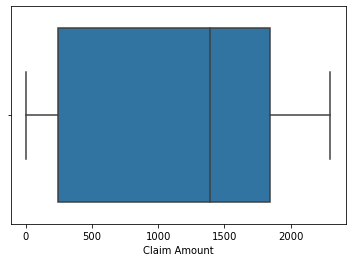

In [24]:
sns.boxplot(df["Claim Amount"])

<AxesSubplot:xlabel='Category Premium'>

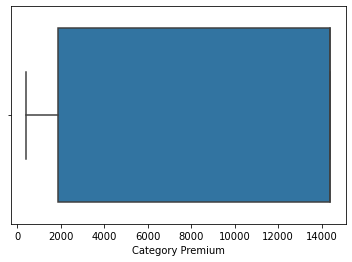

In [25]:
sns.boxplot(df["Category Premium"])

<AxesSubplot:xlabel='BMI'>

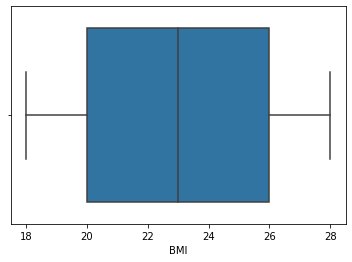

In [28]:
sns.boxplot(df["BMI"])